### Load The Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Make sure it prints the whole array
np.set_printoptions(threshold=np.inf)

df = pd.read_parquet("../data/raw/guitar_sample_parquet")
df.head()

,video_id,title,description,tags,publishedAt,channelTitle,viewCount,likeCount,duration,raw_snippet,raw_statistics,level,topic
0,4WVkDrb6d5A,"A Good, Quick Intermediate Guitar Lesson",Trying to combine a few concepts into one flui...,"[guitar, sean daniel, guitar lesson, sean dani...",2021-08-15T13:00:02Z,Sean Daniel,163929,3868.0,PT12M41S,"{'categoryId': '10', 'channelId': 'UCzZCiVjRPP...","{'commentCount': '148', 'favoriteCount': '0', ...",intermediate,Learning songs
1,WN4IoK7ecAU,How to Teach Yourself Guitar in 2026 (Save YEA...,Are you part of the 90% of aspiring guitarists...,"[O.R.-Guitar, how to play, guitar lesson, guit...",2024-02-05T04:46:37Z,Oryam Bisset,3968428,202324.0,PT10M40S,"{'categoryId': '10', 'channelId': 'UCXUJSxAjaQ...","{'commentCount': '4546', 'favoriteCount': '0',...",beginner,Chords
2,-iV-7XhUMT0,Are You An Intermediate Or Advanced Guitar Pla...,More Guitar Resources:\n🎵 Get my FREE Guitar G...,"[Marty Schwartz, music, guitar, marty music, g...",2020-09-25T14:00:00Z,Marty Music,165635,4986.0,PT10M7S,"{'categoryId': '10', 'channelId': 'UCmnlTWVJys...","{'commentCount': '962', 'favoriteCount': '0', ...",intermediate,Chords
3,wH63GHXTHgU,Advanced Chords Practice Routine - Guitar Less...,"Gain access to TABS, exclusive tutorials and o...","[jazz guitar chords, advanced guitar chords le...",2020-05-05T14:46:45Z,swiftlessons,434634,14417.0,PT16M8S,"{'categoryId': '10', 'channelId': 'UCjdxyPMmti...","{'commentCount': '346', 'favoriteCount': '0', ...",beginner,Chords
4,kNgpKxHo0H4,Memorize the Fretboard in 3 MINUTES!,Fretboard memorization is an essential part of...,"[notes on guitar fretboard, fretboard memoriza...",2021-01-06T20:31:18Z,Redlight Blue,4772989,328588.0,PT4M1S,"{'categoryId': '10', 'channelId': 'UCojVsOfwIR...","{'commentCount': '4172', 'favoriteCount': '0',...",intermediate,Chords


In [3]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1270 entries, 0 to 1269
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   video_id        1270 non-null   str    
 1   title           1270 non-null   str    
 2   description     1270 non-null   str    
 3   tags            1270 non-null   object 
 4   publishedAt     1270 non-null   str    
 5   channelTitle    1270 non-null   str    
 6   viewCount       1270 non-null   int64  
 7   likeCount       1261 non-null   float64
 8   duration        1270 non-null   str    
 9   raw_snippet     1270 non-null   object 
 10  raw_statistics  1270 non-null   object 
 11  level           1270 non-null   str    
 12  topic           1270 non-null   str    
dtypes: float64(1), int64(1), object(3), str(8)
memory usage: 1.6+ MB


In [4]:
# Check how many unknowns
df["level"].value_counts()

level
intermediate    747
beginner        486
advance          37
Name: count, dtype: int64

In [5]:
# # Map ordinal labels to numbers
# level_map = {"beginner": 1, "intermediate": 2, "advance": 3}
# df["level_rank"] = df["level"].map(level_map)

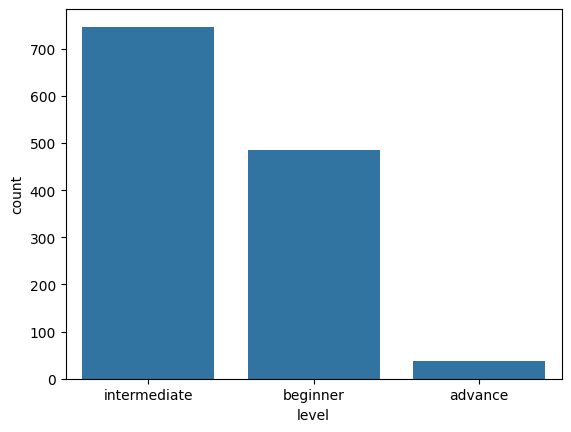

In [ ]:
# View class balance
sns.countplot(data=df, x=df["level"])

# Display the plot
plt.show()

# Prepare the Data

### Split the data

In [7]:
from sklearn.model_selection import train_test_split

text_features = ["title", "description"]

X = df[text_features].copy() # Prevent any potential issues that comes with slicing the dataframe
y = df["level"]

# Concatenate each text column into one column
X['text'] = X.apply(
    lambda x: " ".join(x.astype(str)),
    axis=1
)

X = X[['text']] # return the text feature as a dataframe

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42, test_size=0.2)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1016, 1), (254, 1), (1016,), (254,))

### Create Text Vectorization using TF-IDF

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

X_train = X_train["text"]
X_val = X_val["text"]

vectorizer = TfidfVectorizer(max_features=10000, stop_words=None, ngram_range=(1,2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)

print(X_train_tfidf.shape)
print(len(y_train))

(1016, 10000)
1016


In [9]:
feature_names = vectorizer.get_feature_names_out()

feature_embedded_df = pd.DataFrame(
    data=X_train_tfidf.toarray(),
    columns=feature_names
)

feature_embedded_df.head()

,00,00 00,00 having,00 intro,00 introduction,00 lesson,00 lick,00 quick,00 value,000,...,zombie guitar,zombie on,zombie the,zoom,zoom h1n,zsiibemmcfqy2oinmlamqkdnw,zsiibemmcfqy2oinmlamqkdnw guitar,zsil4ehvbkejwr5urgrjfjpxl,zxajrm,zxajrm magnatone
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.168834,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.29869,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Modeling & Evaluation

### Helper Functions

In [10]:
def show_confusion_matrix(cm, labels):
    cm_df = pd.DataFrame(data=cm, index=labels, columns=labels)
    
    sns.heatmap(cm_df, annot=True, fmt='d', cmap="Blues")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()

In [11]:
def print_scores(y_val, y_pred, labels):
    
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, average='weighted')
    cm = confusion_matrix(y_val, y_pred, labels=labels)
    
    # print accuracy, precision, and confusion matrix
    print(f"accuracy: {accuracy}")
    print(f"precision: {precision}")
    print(f"confusion_matrix: {cm}")
    show_confusion_matrix(cm, labels)

### Model 0: Baseline
**Logistic Regression (Default TF-IDF)**

**Why this model**
Used as a baseline to establish a minimum performance benchmark using a simple linear classifier with default TF-IDF features.

**Expectations**
- Strong performance on frequent patterns
- Limited ability to capture nuanced difficulty distinctions
- Serves as a reference point for all tuned models

**Evaluation Metrics**
- Accuracy
- Precision
- Confusion Matrix - to visualize how well it performs at identifying each lesson

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

lr_model = LogisticRegression(max_iter=1000)

lr_model.fit(X_train_tfidf, y_train)

y_pred_lr = lr_model.predict(X_val_tfidf)

In [13]:
labels = ["beginner", "intermediate", "advance"]

In [14]:
y_val

1214    intermediate
1161    intermediate
422     intermediate
976     intermediate
793         beginner
            ...     
163     intermediate
486     intermediate
626     intermediate
221     intermediate
243     intermediate
Name: level, Length: 254, dtype: str

accuracy: 0.9409448818897638
precision: 0.945163860617926
confusion_matrix: [[ 88   5   0]
 [  1 149   0]
 [  0   9   2]]


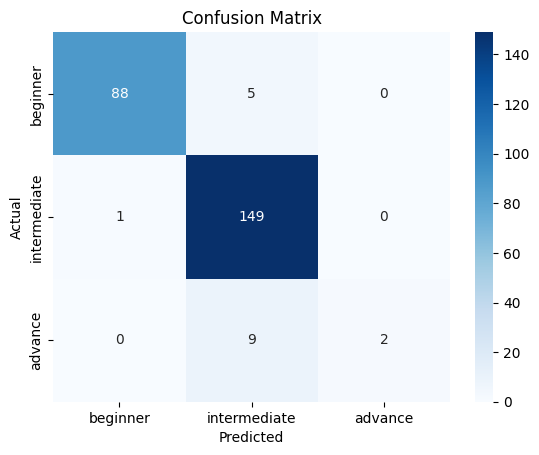

In [15]:
print_scores(y_val, y_pred_lr, labels)

**Observations**
- Performed best on intermediate lessons
- Failure to identify advanced lessons due to a smaller amount of examples

**Decision**
Used strictly as a baseline for comparison.

### Model 1a: Feature-Tuned Linear Model
**Logistic Regression with Optimized TF-IDF**

**Why this model**
Introduced to test whether improved text representation alone could significantly improve classification performance without changing the underlying model.

**Expectations**
- Improved separation between difficulty levels
- Better precision for underrepresented classes

**Evaluation Metrics**
- Accuracy
- Precision
- Confusion matrix

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("clf", LogisticRegression(max_iter=1000))
])
    
param_grid = {
    "tfidf__max_features": [1000, 2500, 5000, 10000, 20000, 28000],
    "tfidf__ngram_range": [(1,1), (1,2)],
    "tfidf__stop_words": [None, 'english']
}

grid = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='f1_macro',
    n_jobs=-1
)

grid.fit(X_train, y_train)

grid.best_params_, grid.best_score_

({'tfidf__max_features': 20000,
  'tfidf__ngram_range': (1, 2),
  'tfidf__stop_words': None},
 np.float64(0.8387795350189078))

In [17]:
best_model = grid.best_estimator_

best_model.fit(X_train, y_train)

y_pred_grid = best_model.predict(X_val)

accuracy: 0.9488188976377953
precision: 0.9519602273796043
confusion_matrix: [[ 90   3   0]
 [  1 149   0]
 [  0   9   2]]


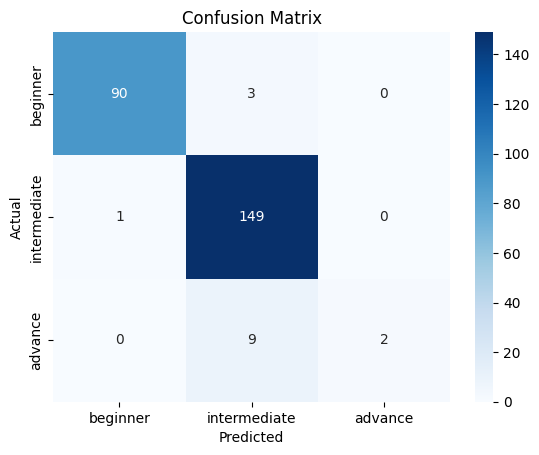

In [18]:
print_scores(y_val, y_pred_grid, labels)

**Observations**
- Precision improved compared to baseline
- Noticeable improvements to identifying beginner lessons.
- Model still unable to identify advance lessons.

**Decision**
Kept as a strong linear benchmark.

### Model 1b: Fully Tuned Linear Model
**Logistic Regression with Optimized TF-IDF + Regularization**

**Why this model**
Does regularization
Added regularization tuning to control model complexity and improve generalization, particularly on higher difficulty classes.

**Expectations**
- More stable predictions across folds
- Improved generalization on validation data

**Evaluation Metrics**
- Accuracy
- Precision
- Confusion Matrix

In [19]:
best_tfidf = TfidfVectorizer(max_features=28000, ngram_range=(1, 2), stop_words=None)

pipeline = Pipeline([
    ("tfidf", best_tfidf), # Using the best tfidf params from previous experiment
    ("clf", LogisticRegression(max_iter=1000))
])

param_grid = {
    "clf__solver": ['lbfgs', 'saga'],
    "clf__penalty": [None, "l1", "elasticnet", "l2"]
    
}

grid_model = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='f1_macro',
    n_jobs=-1
)

grid_model.fit(X_train, y_train)

grid_model.best_params_, grid_model.best_score_

d:\OneDrive\Documents\Content Folder\Data Science\guitar-lesson-level-prediction-project\env\Lib\site-packages\sklearn\model_selection\_validation.py:490: FitFailedWarning: 
10 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "d:\OneDrive\Documents\Content Folder\Data Science\guitar-lesson-level-prediction-project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 833, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\OneDrive\Documents\Content Folder\Data Science\guitar-lesson-level-prediction-project\env\Lib\site-packages\sklearn\base.py", line 1336, in wrapper
    return fit_m

({'clf__penalty': None, 'clf__solver': 'lbfgs'},
 np.float64(0.9729029212004224))

In [20]:
best_grid_model = grid_model.best_estimator_

best_grid_model.fit(X_train, y_train)

y_pred_grid = best_grid_model.predict(X_val)

d:\OneDrive\Documents\Content Folder\Data Science\guitar-lesson-level-prediction-project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(


accuracy: 0.9921259842519685
precision: 0.9922295897223373
confusion_matrix: [[ 93   0   0]
 [  0 150   0]
 [  0   2   9]]


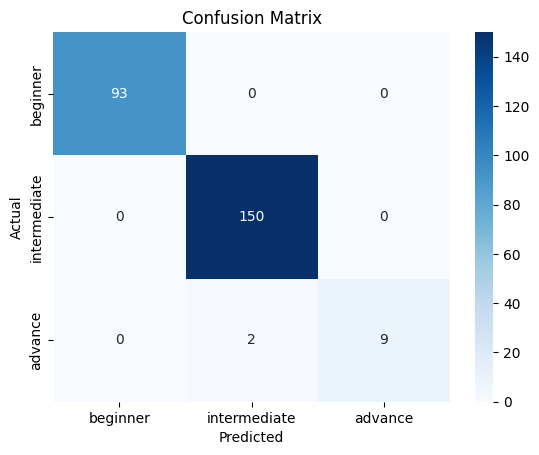

In [21]:
print_scores(y_val, y_pred_grid, labels)

**Observations**
- Precision improved even more.
- Drastic improvements in identifying advanced lessons

**Decision**
Selected as the best-performing standard linear classifier.

### Model 1c: Ordinal Linear Model
**Ordinal Logistic Regression (Optimized TF-IDF)**

**Why this model**
Lesson difficulty is inherently ordinal. This model was introduced to explicitly encode ordering between classes rather than treating them as independent categories.

**Expectations**
- Fewer extreme misclassifications compared to baseline

**Evaluation Metrics**
- Accuracy
- Precision
- Confusion Matrix

In [22]:
from mord import LogisticIT # ORDINAL Logistic Regression
from sklearn.preprocessing import LabelEncoder

X_train_best_tfidf = best_tfidf.fit_transform(X_train)
X_val_best_tfidf = best_tfidf.transform(X_val)

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

ordinal_model = LogisticIT(max_iter=1000)

ordinal_model.fit(X_train_best_tfidf, y_train_encoded)

y_pred_ordinal = ordinal_model.predict(X_val_best_tfidf)

y_pred_ordinal_label = label_encoder.inverse_transform(y_pred_ordinal)
y_pred_ordinal_label


array(['intermediate', 'intermediate', 'intermediate', 'intermediate',
       'beginner', 'intermediate', 'intermediate', 'intermediate',
       'beginner', 'beginner', 'intermediate', 'beginner', 'beginner',
       'beginner', 'intermediate', 'beginner', 'intermediate', 'beginner',
       'intermediate', 'intermediate', 'intermediate', 'intermediate',
       'beginner', 'beginner', 'intermediate', 'beginner', 'intermediate',
       'intermediate', 'beginner', 'beginner', 'intermediate',
       'intermediate', 'intermediate', 'intermediate', 'intermediate',
       'intermediate', 'intermediate', 'beginner', 'intermediate',
       'beginner', 'intermediate', 'intermediate', 'intermediate',
       'beginner', 'intermediate', 'intermediate', 'beginner',
       'intermediate', 'beginner', 'intermediate', 'beginner',
       'intermediate', 'beginner', 'intermediate', 'beginner',
       'intermediate', 'intermediate', 'intermediate', 'beginner',
       'beginner', 'intermediate', 'beginner',

accuracy: 0.9291338582677166
precision: 0.8887281346556364
confusion_matrix: [[ 87   6   0]
 [  1 149   0]
 [  8   3   0]]


d:\OneDrive\Documents\Content Folder\Data Science\guitar-lesson-level-prediction-project\env\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


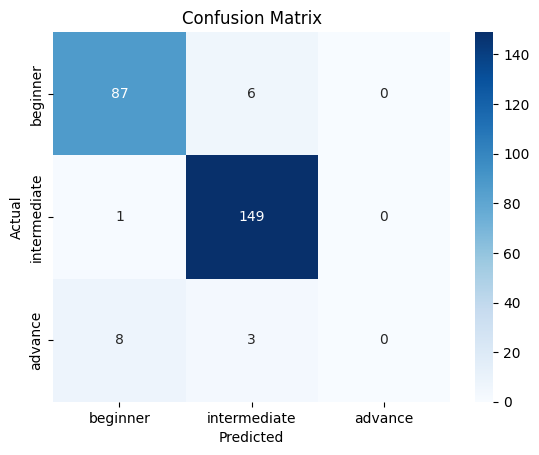

In [23]:
print_scores(y_val, y_pred_ordinal_label, labels)

**Observations**
- Precision took a significant drop compared to baseline
- Incapable of identifying advanced lessons. Base Model is superior

**Decision**
The least-performing linear classifier.

### Model 2: Probabilistic Models
**Naive Bayes Classifier**

**Why this model**
Evaluated to test whether strong independence assumptions and probabilistic modeling could perform competitively on text-heavy features.

**Expectations**
- Fast training
- Reasonable performance on high-frequency tokens

In [24]:
from sklearn.naive_bayes import MultinomialNB

bayes_model = MultinomialNB()

bayes_model.fit(X_train_best_tfidf, y_train)

y_pred_bayes = bayes_model.predict(X_val_best_tfidf)

y_pred_bayes

array(['intermediate', 'intermediate', 'intermediate', 'intermediate',
       'beginner', 'intermediate', 'intermediate', 'intermediate',
       'beginner', 'intermediate', 'intermediate', 'beginner', 'beginner',
       'beginner', 'intermediate', 'beginner', 'intermediate', 'beginner',
       'intermediate', 'intermediate', 'intermediate', 'intermediate',
       'beginner', 'beginner', 'intermediate', 'beginner', 'intermediate',
       'intermediate', 'beginner', 'beginner', 'intermediate',
       'intermediate', 'intermediate', 'intermediate', 'intermediate',
       'intermediate', 'intermediate', 'intermediate', 'intermediate',
       'beginner', 'intermediate', 'intermediate', 'intermediate',
       'beginner', 'intermediate', 'intermediate', 'beginner',
       'intermediate', 'intermediate', 'intermediate', 'beginner',
       'intermediate', 'intermediate', 'intermediate', 'intermediate',
       'intermediate', 'intermediate', 'intermediate', 'beginner',
       'beginner', 'interm

d:\OneDrive\Documents\Content Folder\Data Science\guitar-lesson-level-prediction-project\env\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


accuracy: 0.8622047244094488
precision: 0.8389920806936142
confusion_matrix: [[ 71  22   0]
 [  2 148   0]
 [  0  11   0]]


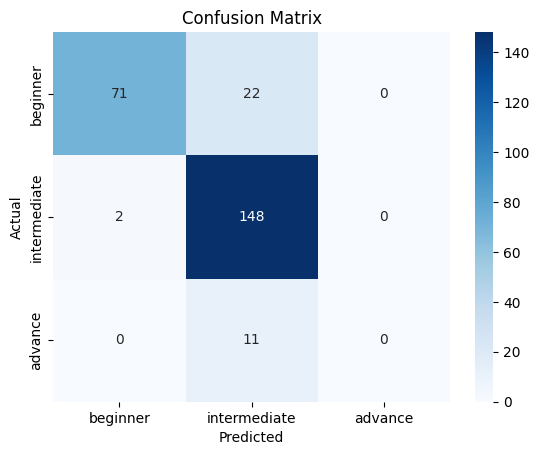

In [25]:
print_scores(y_val, y_pred_bayes, labels)

**Observations**
- Poor at determining an advance lesson
- Significantly poor performance at identifying beginner lessons compared to baseline.
- Drastic drop in precision compared to baseline

**Decision**
Discarded for final use

### Model 3: Tree-Based Models
**Random Forest Classifier**

**Why this model**
Introduced to capture non-linear interactions between features and overcome limitations of linear decision boundaries.

**Expectations**
- Improved class separation even if it's a slight improvement

In [26]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()

rf_model.fit(X_train_best_tfidf, y_train)

y_pred_rf = rf_model.predict(X_val_best_tfidf)

y_pred_rf

array(['intermediate', 'intermediate', 'intermediate', 'intermediate',
       'beginner', 'intermediate', 'intermediate', 'intermediate',
       'beginner', 'beginner', 'intermediate', 'beginner', 'beginner',
       'beginner', 'intermediate', 'beginner', 'advance', 'beginner',
       'intermediate', 'intermediate', 'intermediate', 'intermediate',
       'beginner', 'beginner', 'intermediate', 'beginner', 'intermediate',
       'intermediate', 'beginner', 'beginner', 'intermediate',
       'intermediate', 'intermediate', 'intermediate', 'intermediate',
       'intermediate', 'intermediate', 'beginner', 'intermediate',
       'beginner', 'beginner', 'intermediate', 'intermediate', 'beginner',
       'intermediate', 'intermediate', 'beginner', 'intermediate',
       'beginner', 'intermediate', 'beginner', 'intermediate', 'beginner',
       'intermediate', 'advance', 'intermediate', 'intermediate',
       'intermediate', 'beginner', 'beginner', 'intermediate', 'beginner',
       'intermed

accuracy: 0.9921259842519685
precision: 0.9922295897223373
confusion_matrix: [[ 93   0   0]
 [  0 150   0]
 [  0   2   9]]


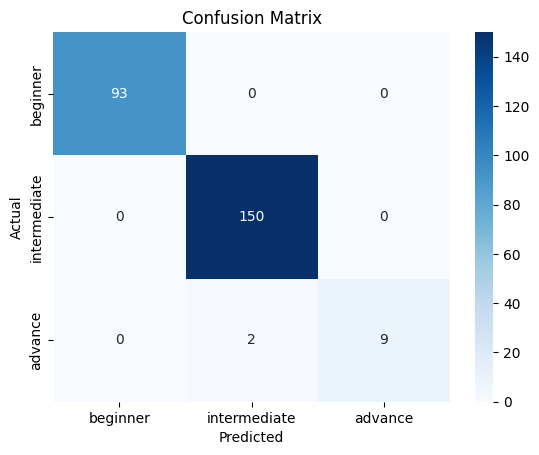

In [27]:
print_scores(y_val, y_pred_rf, labels)

**Observations**
- Improved performance on identifying advanced classes
- Precision is equal to a tuned logisic model

**Decision**
Strong candidate but performance must be test on a larger dataset to see if a tuned logistic regression and random forest are still equals.

### Model 4: Boosted Tree Models
**Gradient Boosting / XGBoost Classifier**

**Why this model**
Is a boosted model even necessary at this point? Does it perform even slightly better than a tune logistic mode or random forest?

**Expectations**
- Best overall performance

accuracy: 0.9921259842519685
precision: 0.9922295897223373
confusion_matrix: [[ 93   0   0]
 [  0 150   0]
 [  0   2   9]]


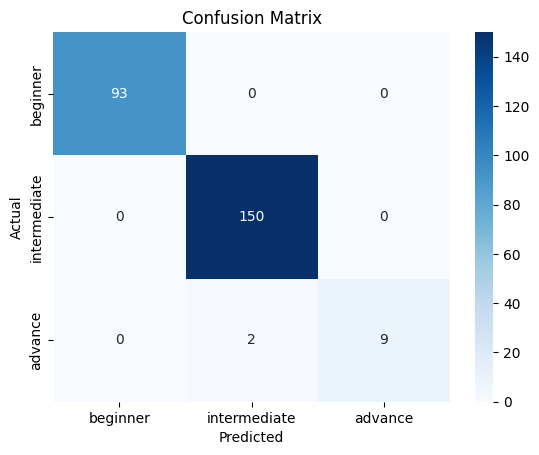

In [28]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(objective="multiclass:softprob", num_class=3)

xgb_model.fit(X_train_best_tfidf, y_train_encoded)

y_pred_xgb = xgb_model.predict(X_val_best_tfidf)

y_pred_xgb = label_encoder.inverse_transform(y_pred_xgb)

print_scores(y_val, y_pred_xgb, labels)

**Observations**
- Precision and performance equal to random forest and a tuned logistic regression

**Decision**
Same verdict as random forest a very strong candidate but it's currently unncessary on a small dataset. Model must be performed on a larger dataset to see how well it stacks against the others.

In [29]:
# from sentence_transformers import SentenceTransformer

# sentence_transformer = SentenceTransformer('all-MiniLM-L6-v2')
# X_train_embed = sentence_transformer.encode(X_train.to_list())
# X_val_embed = sentence_transformer.encode(X_val.to_list())

# print(X_train_embed.shape)
# print(len(y_train))|